In [49]:
# Dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st        
import numpy as np
import statistics as stat

In [3]:
#Reading the Data Set
df=pd.read_csv("./ds_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()
# missing_values

In [5]:
#Checking for null values
df.isna().sum()

In [6]:
#dropiing the same information column for salary
df=df.drop(['salary','salary_currency'], axis=1)


In [7]:
#renaming employment types 
df['employment_type']=df['employment_type'].replace("FT", "Full-time")
df['employment_type']=df['employment_type'].replace("PT", "Part-time")
df['employment_type']=df['employment_type'].replace("CT", "Contractual")
df['employment_type']=df['employment_type'].replace("FL", "Freelancer")

In [8]:
#renaming company size
df['company_size']=df['company_size'].replace("L", "Large")
df['company_size']=df['company_size'].replace("M", "Medium")
df['company_size']=df['company_size'].replace("S", "Small")

In [9]:
#Find duplicate rows
duplicate_rows = df[df.duplicated()]
#Remove duplicate rows
df = df.drop_duplicates()

In [10]:
#Finding the number of rows and column of Data set
a, b = df.shape
print("Data_Set shape: rows {} & columns {}".format(a, b))

Data_Set shape: rows 2584 & columns 9


In [12]:
df.info()

In [13]:
df.describe()

In [26]:
# Employment_Type (Univariant Analysis)
employment_type = df["employment_type"].value_counts()
employment_type

Full-time      2547
Part-time        17
Contractual      10
Freelancer       10
Name: employment_type, dtype: int64

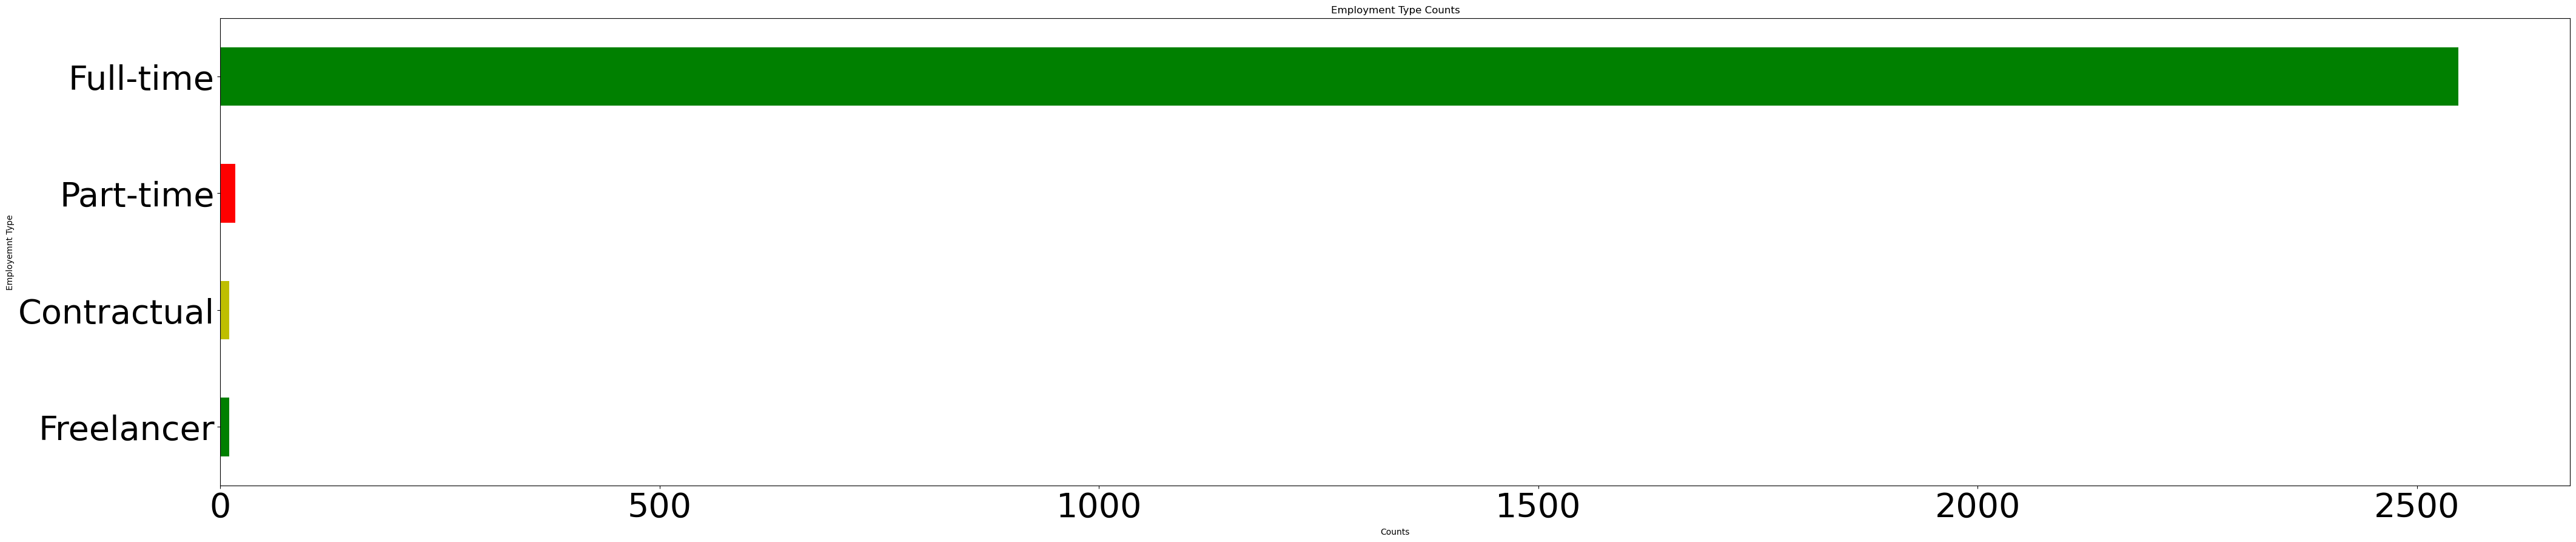

In [44]:
employment_type.plot(
    kind="barh",
    figsize=(50,10),
    color=["g","r","y"],
    title="Employment Type Counts",
    ylabel="Employemnt Type",
    xlabel="Counts",
    fontsize=40).invert_yaxis()


In [16]:
#company_location (Univariant Analysis)
company_locations_counts=df["company_location"].value_counts()
top10_company_locations= company_locations_counts.head(10)


<Axes: title={'center': 'Top 10 Countries for Data Science Jobs'}, xlabel='Number Of Jobs Per Country', ylabel='Company Locations'>

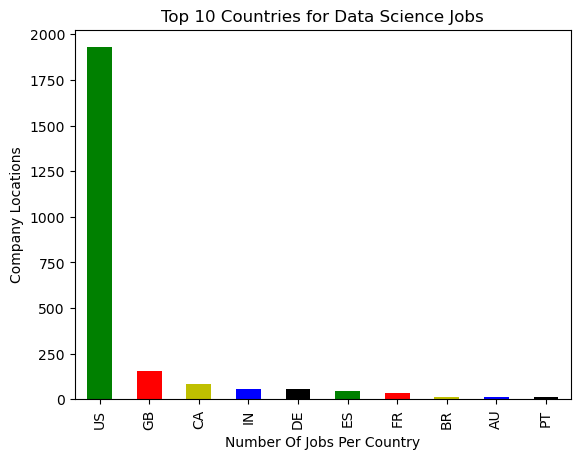

In [35]:
#Top 10 company loations
top10_company_locations.plot(
    kind="bar",
    color=["g","r","y","b","k"],
    title="Top 10 Countries for Data Science Jobs",
    xlabel = "Number Of Jobs Per Country", 
    ylabel ="Company Locations",

)

# Pair Plotting or Bivariant Analysis

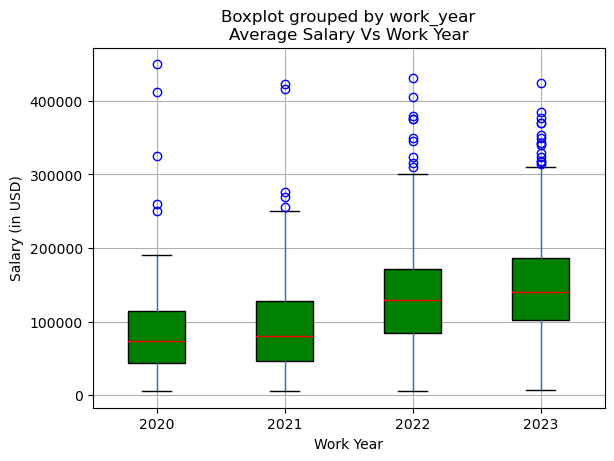

In [47]:
# Salary vs. Experience Level
a="blue"
b="red"
c="green"

df.boxplot(
    column=["salary_in_usd"], 
    by=["work_year"], 
    patch_artist=True, 
    boxprops=dict(facecolor=c), 
    flierprops=dict(color=a, markeredgecolor=a), 
    medianprops=dict(color=b)
)
plt.title('Average Salary Vs Work Year')
plt.xlabel('Work Year')
plt.ylabel('Salary (in USD)')
plt.show()



# After analyzing the box plot we may conclude that median salaries were 
#almost same in year 2020 and 2021 however in year 2022 and 2023 it got a substantial increase.

#OUTLIERS??

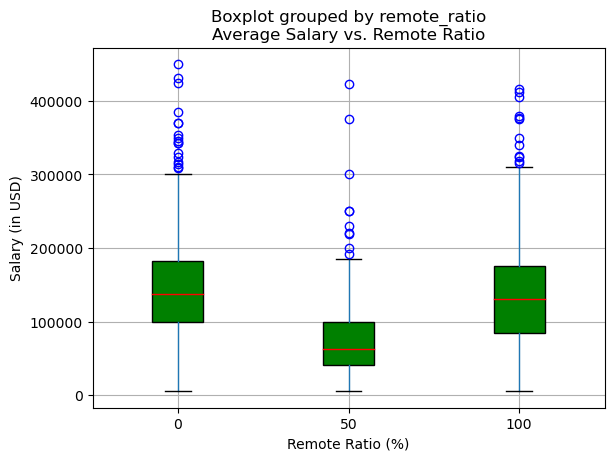

In [48]:
# Salary vs. Experience Level
a="blue"
b="red"
c="green"
df.boxplot(
    column=["salary_in_usd"], 
    by=["remote_ratio"], 
    patch_artist=True, 
    boxprops=dict(facecolor=c), 
    flierprops=dict(color=a, markeredgecolor=a), 
    medianprops=dict(color=b)
)
plt.title('Average Salary vs. Remote Ratio')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Salary (in USD)')
plt.show()


# If we analyze this box plot for the given dataset, we can see that hybrid model 
#does not work well in terms of salaries withdrawn from the company. Even if we choose 100 percent remote 
#, we may be able to get much better salaries than in hybrid model.